<a href="https://colab.research.google.com/github/pacayton/Forecasting_Codes/blob/main/TS_FA_Ch11_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code Companion for Forecasting: Principles and Practice, 2nd Edition

Reference Site for Original Codes: https://otexts.com/fpp2/hierarchical.html

For Chapter 11: Advanced forecasting methods

Additional Codes by: Dr Peter Julian Cayton,

School of Statistics, University of the Philippines Diliman

https://scholar.google.com/citations?user=KtH_mGEAAAAJ

In [1]:
## Preamble

install.packages("fpp2")
library(fpp2)

## A package for Vector Autoregression
install.packages("vars")
library(vars)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.4.0     ✔ fma       2.4  
✔ forecast  8.19      ✔ expsmooth 2.3  



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Loading required package: MASS


Attaching package: ‘MASS’


The following objects are masked from ‘package:fma’:

    cement, housing, petrol


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.n

In [2]:
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



11.1 Complex seasonality

In [4]:
str(calls)

 Time-Series [1:27716] from 1 to 33.8: 111 113 76 82 91 87 75 89 99 125 ...
 - attr(*, "names")= chr [1:27716] "X3.3.20031" "X3.3.20032" "X3.3.20033" "X3.3.20034" ...
 - attr(*, "msts")= num [1:2] 169 845


In [5]:
### msts examples
### msts(data, seasonal.periods, ts.frequency = floor(max(seasonal.periods)), start = NULL, end = NULL)
x <- msts(taylor, seasonal.periods=c(2*24,2*24*7,2*24*365), start=2000+22/52)
str(x)

 Time-Series [1:4032] from 2000 to 2001: 22262 21756 22247 22759 22549 22313 22128 21860 21751 21336 ...
 - attr(*, "msts")= num [1:3] 48 336 17520


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


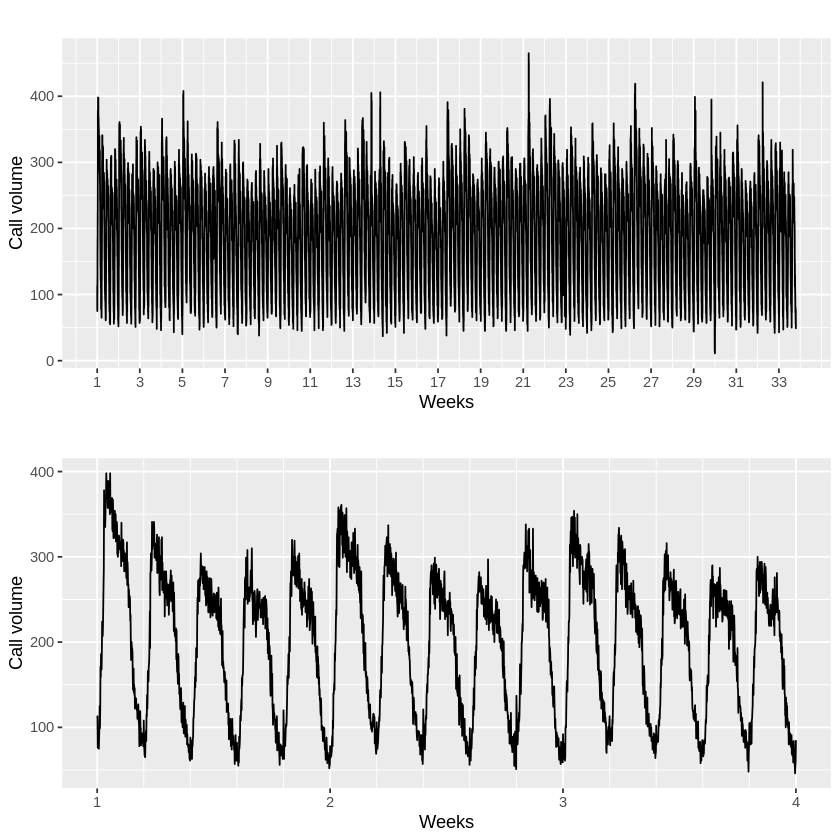

In [3]:
p1 <- autoplot(calls) +
  ylab("Call volume") + xlab("Weeks") +
  scale_x_continuous(breaks=seq(1,33,by=2))

p2 <- autoplot(window(calls, end=4)) +
  ylab("Call volume") + xlab("Weeks") +
  scale_x_continuous(minor_breaks = seq(1,4,by=0.2))

gridExtra::grid.arrange(p1,p2)

STL with multiple seasonal periods

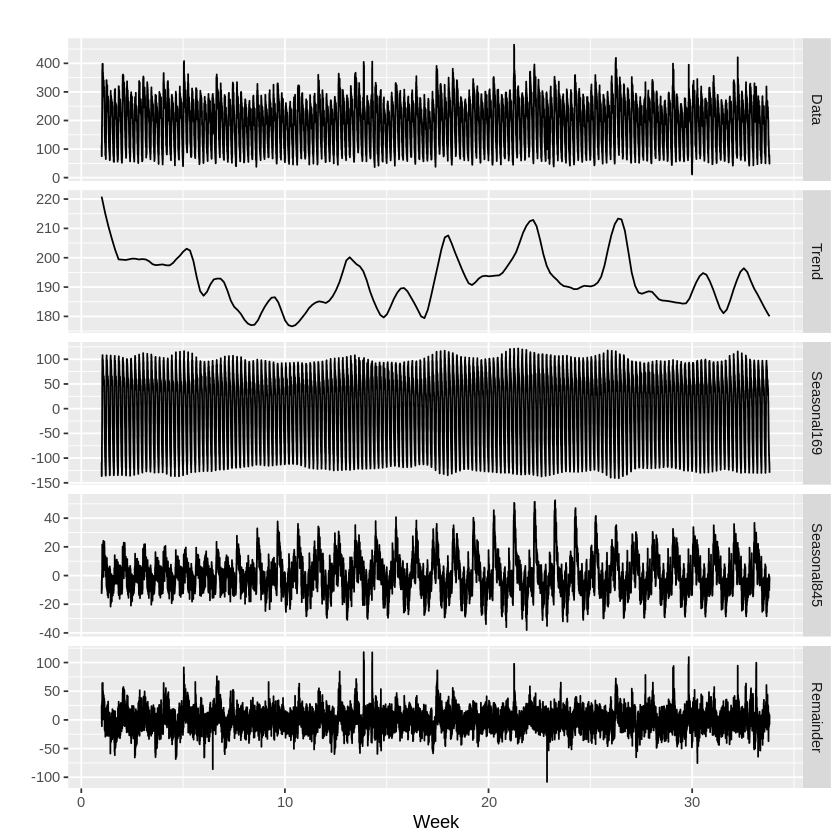

In [6]:
calls %>% mstl() %>%
autoplot() + xlab("Week")

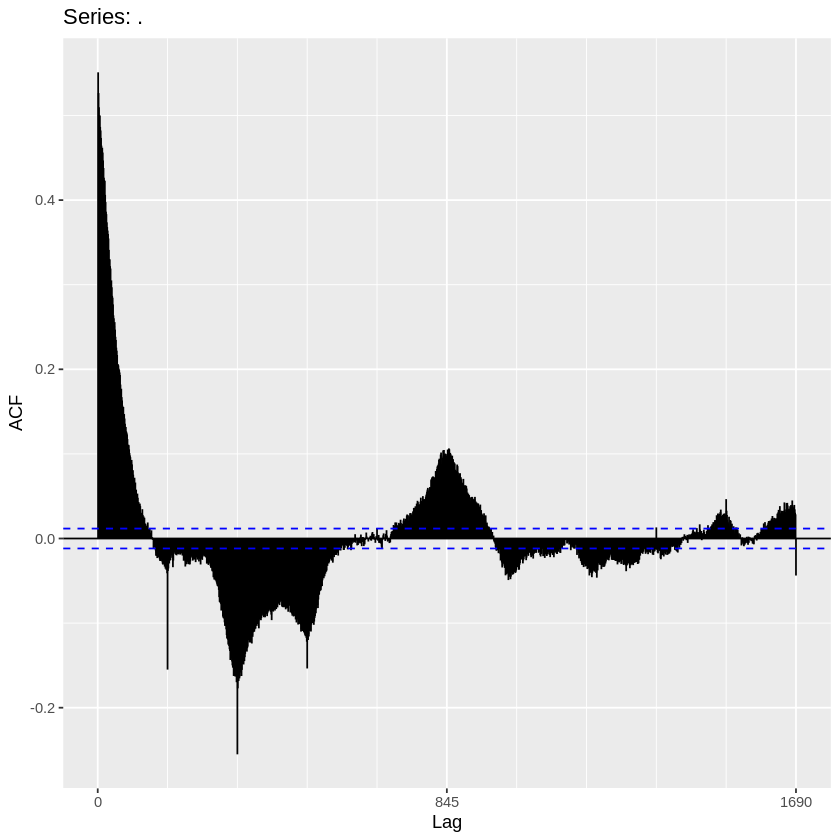

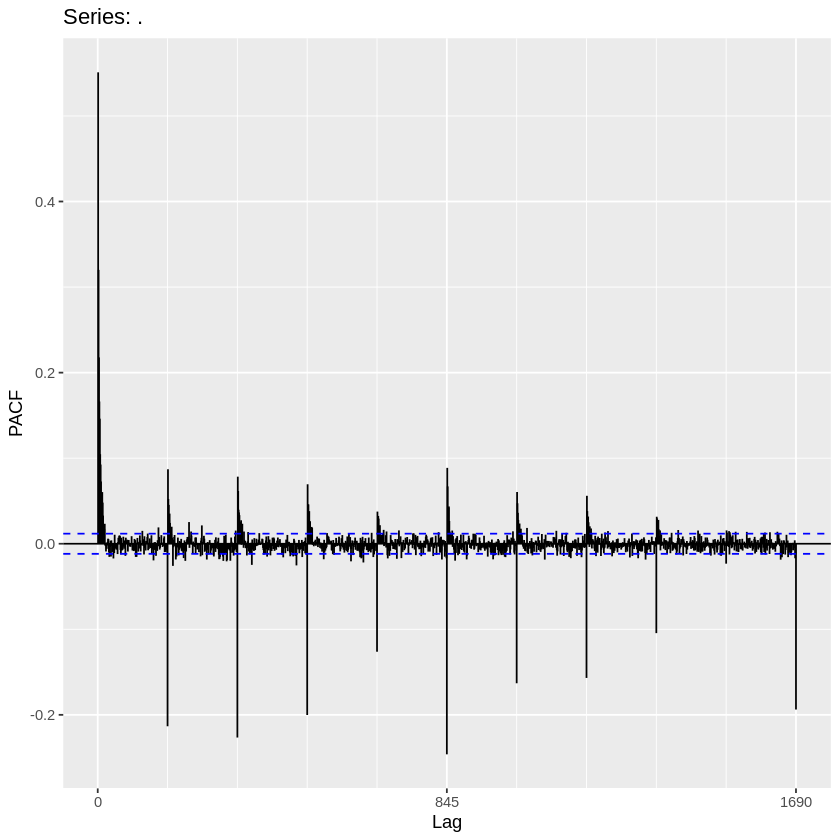

In [13]:
## Remainder check

calls %>% mstl() %>% remainder() %>% ggAcf()

calls %>% mstl() %>% remainder() %>% ggPacf()

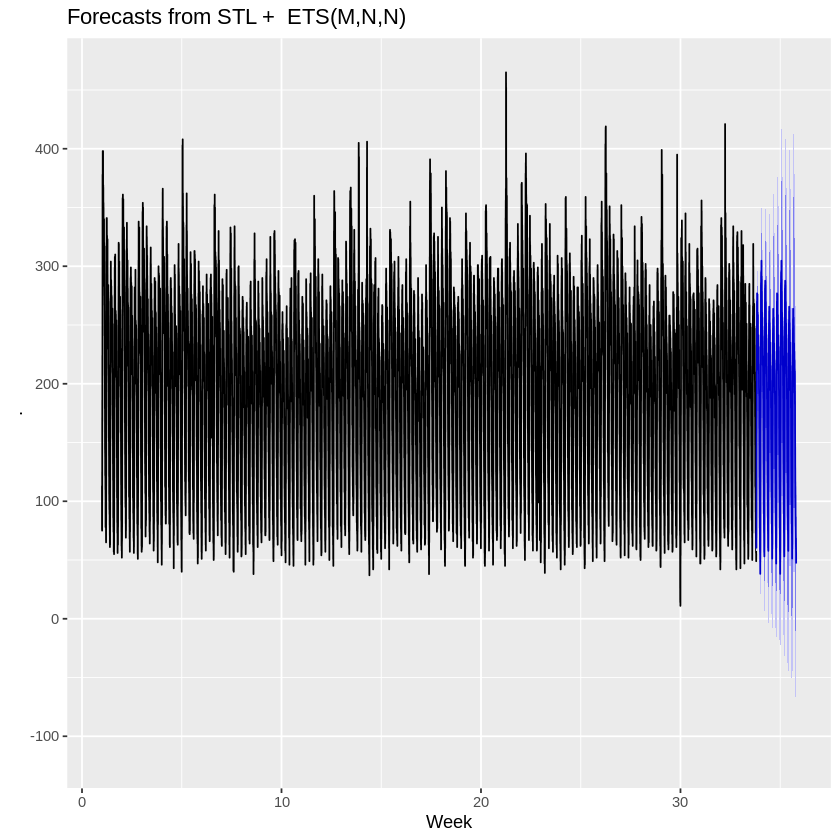

In [9]:
calls %>% stlf() %>%
autoplot() + xlab("Week")

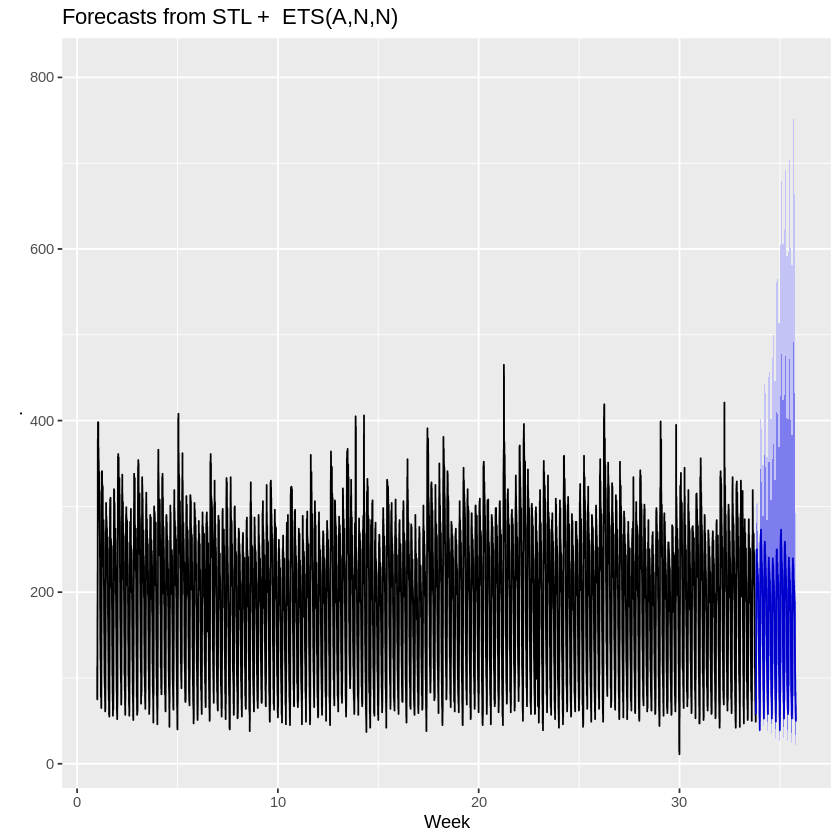

In [10]:
calls %>% stlf(, lambda = 0) %>%
autoplot() + xlab("Week")

Dynamic harmonic regression with multiple seasonal
periods

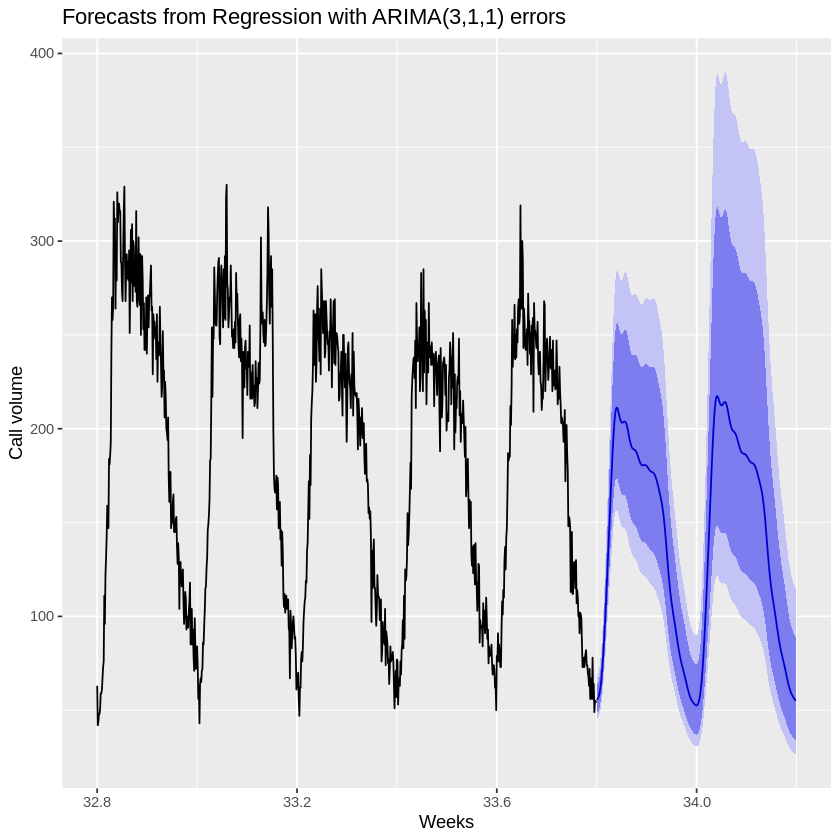

In [14]:
fit <- auto.arima(calls, seasonal=FALSE, lambda=0,
  xreg=fourier(calls, K=c(10,10)))

fit %>%
  forecast(xreg=fourier(calls, K=c(10,10), h=2*169)) %>%
  autoplot(include=5*169) +
  ylab("Call volume") + xlab("Weeks")

Series: calls 
Regression with ARIMA(3,1,1) errors 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2     ar3      ma1  S1-169   C1-169  S2-169   C2-169
      0.1372  0.0477  0.0006  -0.8326  0.2884  -0.5151  0.1153  -0.2302
s.e.  0.0091  0.0078  0.0074   0.0069  0.0046   0.0046  0.0024   0.0024
       S3-169   C3-169   S4-169   C4-169   S5-169   C5-169   S6-169  C6-169
      -0.0405  -0.0887  -0.0480  -0.0460  -0.0208  -0.0068  -0.0100  0.0089
s.e.   0.0017   0.0017   0.0014   0.0014   0.0013   0.0013   0.0012  0.0012
       S7-169  C7-169  S8-169   C8-169   S9-169  C9-169  S10-169  C10-169
      -0.0052  0.0017  -5e-04  -0.0033  -0.0047  0.0029  -0.0048   0.0083
s.e.   0.0011  0.0011   1e-03   0.0010   0.0010  0.0010   0.0010   0.0010
      S1-845   C1-845  S2-845   C2-845  S3-845   C3-845  S4-845   C4-845
      0.0175  -0.0092  0.0011  -0.0133  0.0091  -0.0035  0.0064  -0.0017
s.e.  0.0224   0.0224  0.0112   0.0112  0.0075   0.0075  0.0057   0.0057
       S6-845


	Ljung-Box test

data:  Residuals from Regression with ARIMA(3,1,1) errors
Q* = 9557.9, df = 1686, p-value < 2.2e-16

Model df: 4.   Total lags used: 1690



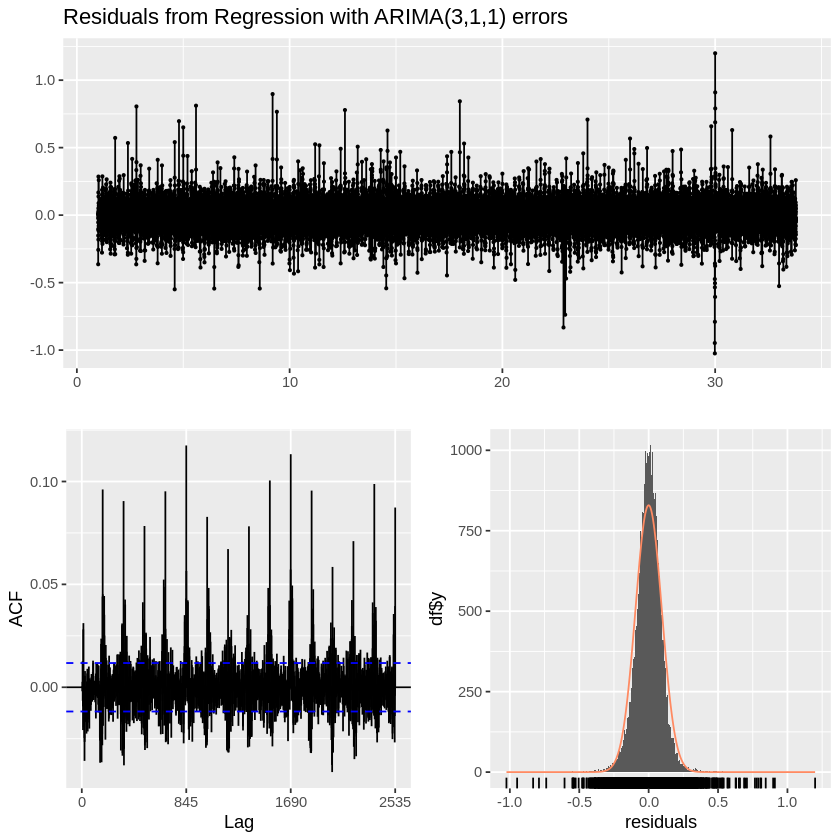

In [15]:
summary(fit)

checkresiduals(fit)

TBATS models

T= trigonometric seasonality (Fourier terms)
B= Box-Cox transformation
A= ARIMA errors
T= Trend component of ETS smoothing
S= Seasonal component of ETS exponential smoothing

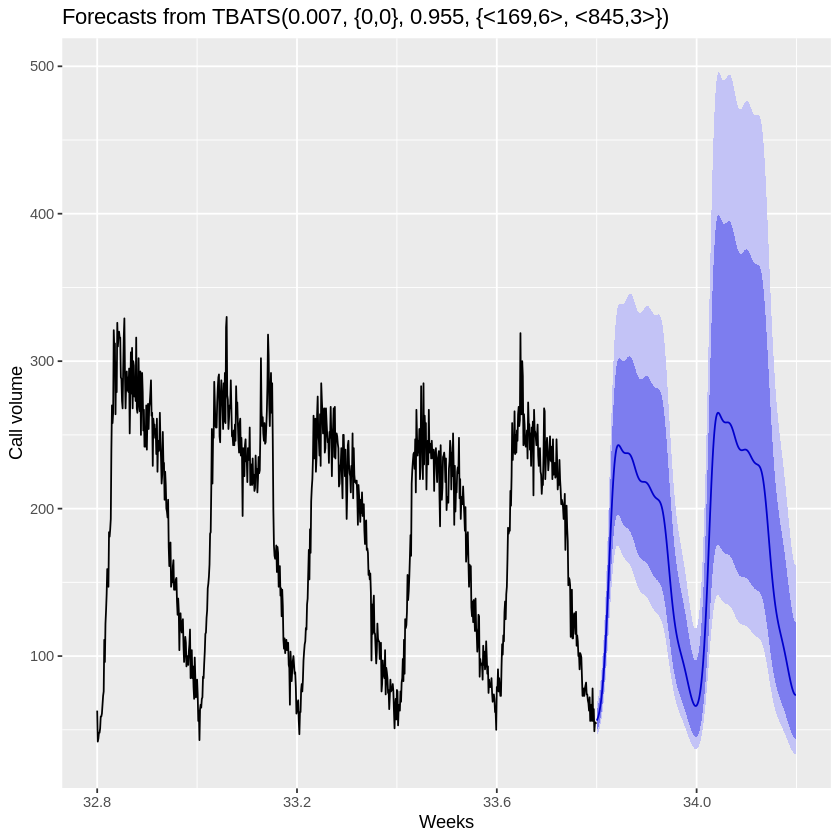

In [16]:
calls %>%
  subset(start=length(calls)-2000) %>%
  tbats() -> fit2

fc2 <- forecast(fit2, h=2*169)

autoplot(fc2, include=5*169) + ylab("Call volume") + xlab("Weeks")

In [19]:
fit2

TBATS(0.007, {0,0}, 0.955, {<169,6>, <845,3>})

Call: tbats(y = .)

Parameters
  Lambda: 0.007475
  Alpha: 0.2795614
  Beta: -0.01188974
  Damping Parameter: 0.955268
  Gamma-1 Values: -0.002529841 0.001402413
  Gamma-2 Values: -0.0002082891 0.0004118706

Seed States:
              [,1]
 [1,]  5.133251626
 [2,]  0.001079161
 [3,] -0.025194077
 [4,]  0.226808059
 [5,]  0.090409919
 [6,]  0.073786026
 [7,]  0.017771836
 [8,]  0.007626536
 [9,]  0.599865151
[10,]  0.159275557
[11,]  0.036812125
[12,] -0.012381997
[13,] -0.024560541
[14,] -0.009237013
[15,]  0.008450963
[16,] -0.040939911
[17,] -0.014978262
[18,] -0.040024102
[19,]  0.025961658
[20,]  0.020651092
attr(,"lambda")
[1] 0.007474694

Sigma: 0.09593398
AIC: 26262.08

Complex seasonality with covariates

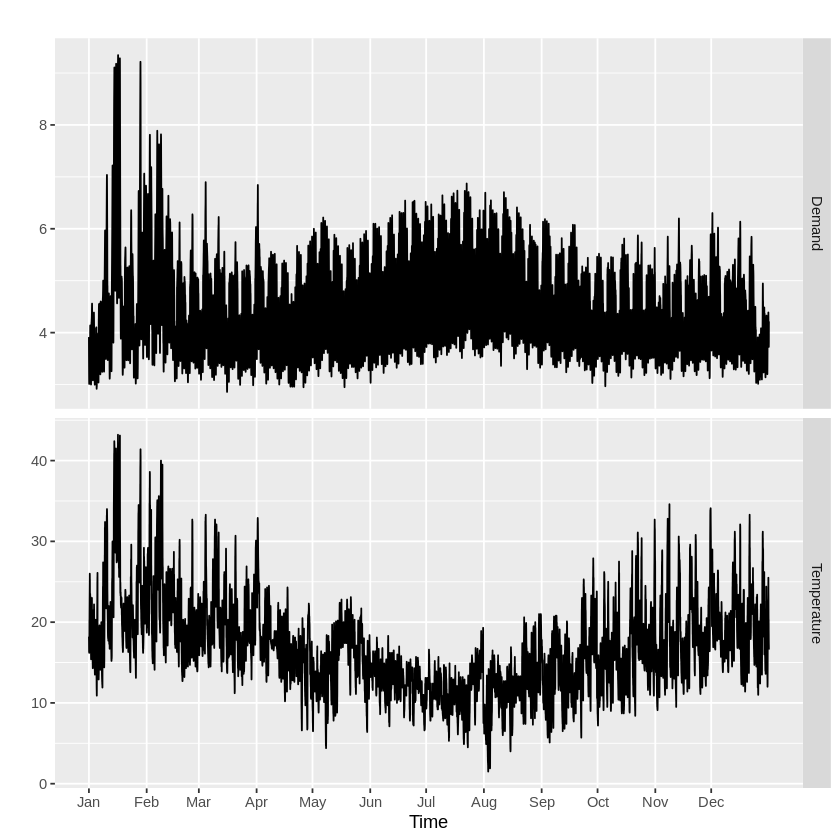

In [20]:
autoplot(elecdemand[,c("Demand","Temperature")], facet=TRUE) +
  scale_x_continuous(minor_breaks=NULL,
    breaks=2014+cumsum(c(0,31,28,31,30,31,30,31,31,30,31,30))/365,
    labels=month.abb) +
  xlab("Time") + ylab("")

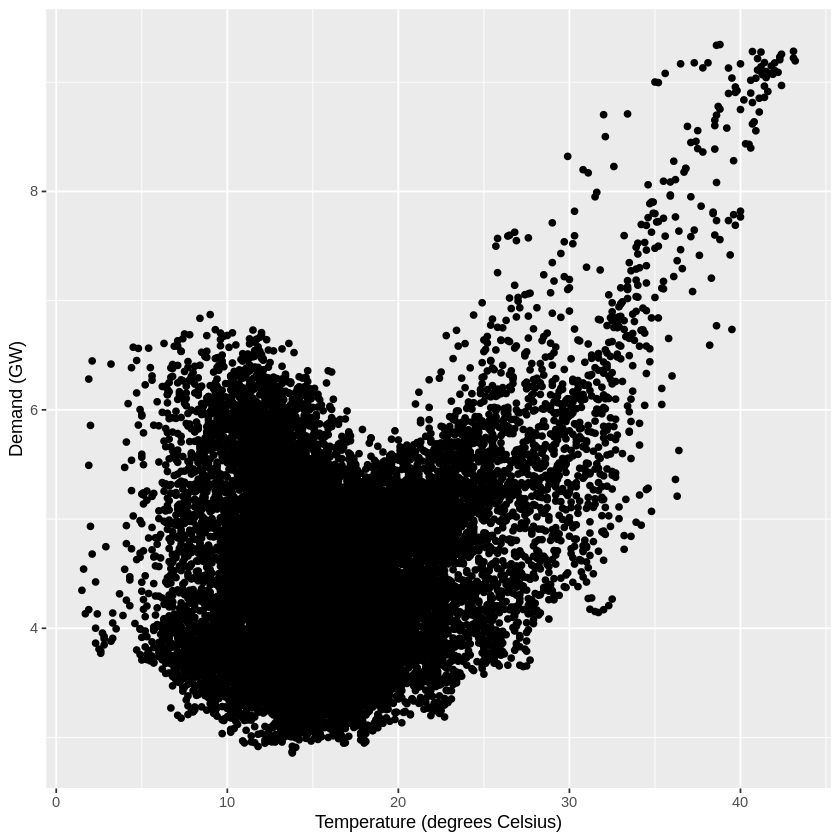

In [21]:
elecdemand %>%
as.data.frame() %>%
ggplot(aes(x=Temperature, y=Demand)) + geom_point() +
xlab("Temperature (degrees Celsius)") +
ylab("Demand (GW)")

In [22]:
cooling <- pmax(elecdemand[,"Temperature"], 18)
### piecewise function in which temp < 18 is set as 18

fit <- auto.arima(elecdemand[,"Demand"],
                  xreg = cbind(fourier(elecdemand, c(10,10,0)),
                                heating=elecdemand[,"Temperature"],
                                cooling=cooling))

Warning message in forecast.forecast_ARIMA(fit, xreg = cbind(fourier(temps, c(10, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”


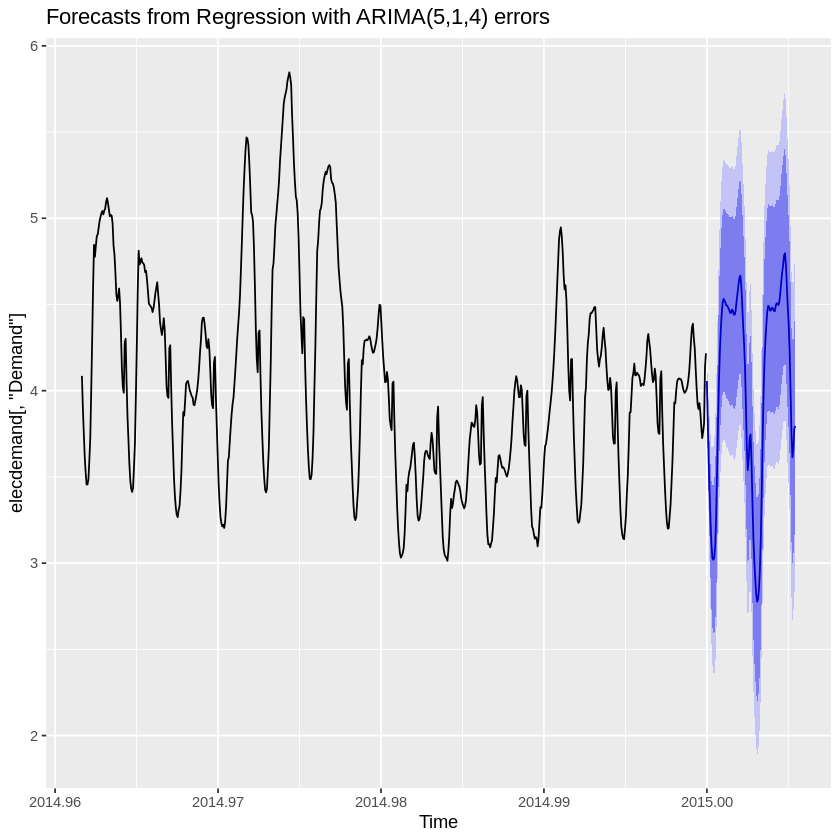

In [23]:
temps <- subset(elecdemand[,"Temperature"],
  start=NROW(elecdemand)-2*48+1)
## scenario: the last 2 days of temperature carry over to the next 2 days

fc <- forecast(fit,
  xreg=cbind(fourier(temps, c(10,10,0)),
  heating=temps, cooling=pmax(temps,18)))
  
autoplot(fc, include=14*48)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(5,1,4) errors
Q* = 738458, df = 3495, p-value < 2.2e-16

Model df: 9.   Total lags used: 3504



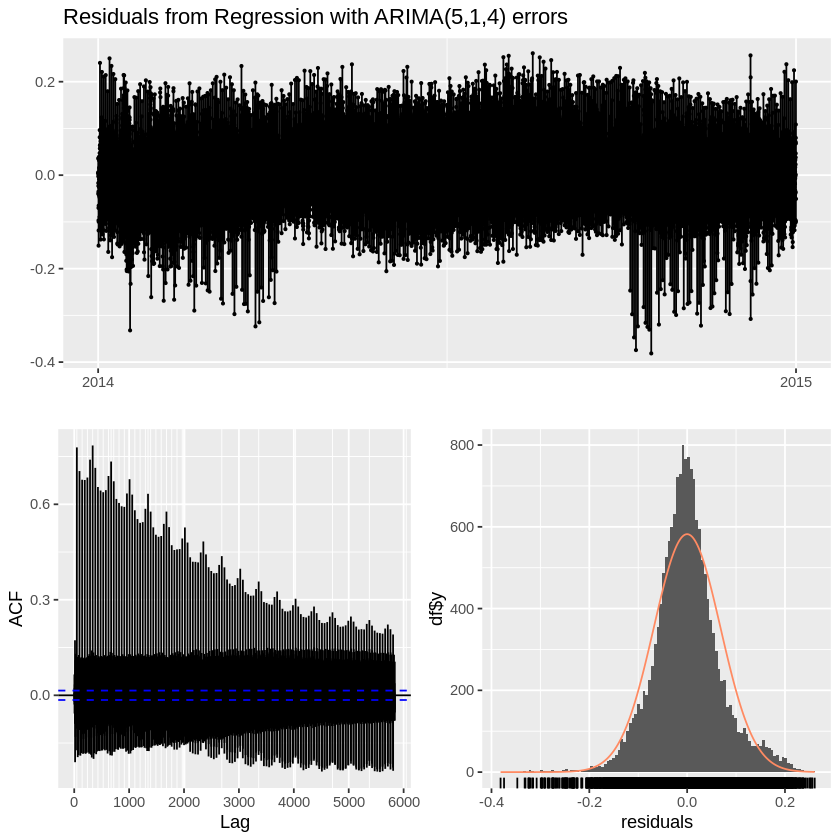

In [24]:
checkresiduals(fc)

11.2 Vector autoregressions

In [25]:
VARselect(uschange[,1:2], lag.max=8,
type="const")[["selection"]]

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      1      1      5

In [26]:
uschange[,1:2]

,Consumption,Income
1970 Q1,0.61598622,0.97226104
1970 Q2,0.46037569,1.16908472
1970 Q3,0.87679142,1.55327055
1970 Q4,-0.27424514,-0.25527238
1971 Q1,1.89737076,1.98715363
1971 Q2,0.91199291,1.44733417
1971 Q3,0.79453885,0.53181193
1971 Q4,1.64858747,1.16012514
1972 Q1,1.31372218,0.45701150
1972 Q2,1.89147495,1.01662441


In [27]:
## VAR(1) model
var1 <- VAR(uschange[,1:2], p=1, type="const")

serial.test(var1, lags.pt=10, type="PT.asymptotic")


## VAR(2) model
var2 <- VAR(uschange[,1:2], p=2, type="const")

serial.test(var2, lags.pt=10, type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var1
Chi-squared = 49.102, df = 36, p-value = 0.07144

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var1
Chi-squared = 49.102, df = 36, p-value = 0.07144




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var2
Chi-squared = 47.741, df = 32, p-value = 0.03633

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var2
Chi-squared = 47.741, df = 32, p-value = 0.03633



In [29]:
## VAR(3) model

var3 <- VAR(uschange[,1:2], p=3, type="const")
serial.test(var3, lags.pt=10, type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var3
Chi-squared = 33.617, df = 28, p-value = 0.2138

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var3
Chi-squared = 33.617, df = 28, p-value = 0.2138



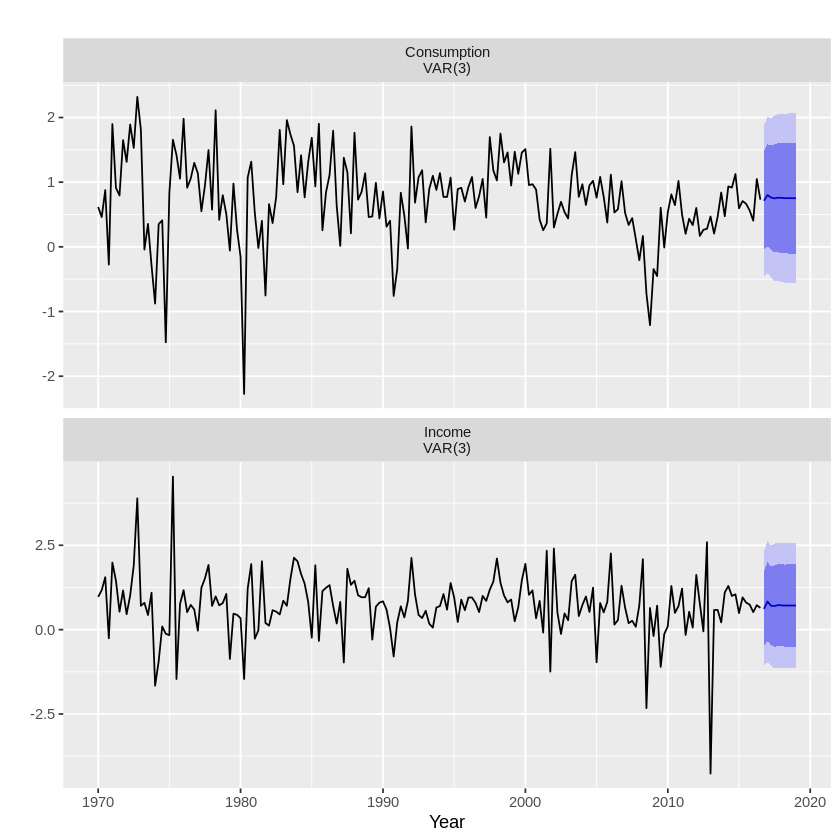

In [30]:
## Forecast with Plot

forecast(var3) %>%
autoplot() + xlab("Year")

11.3 Neural network models

$y_t$ ~ NNAR(p, k)

p = number of lags of the time series used as input

k = nodes in 1 hidden layer


if $y_t$ is seasonal with frequency m (e.g., m= 4 for quaretrly), then

$y_t$ ~ NNAR(p,P,k)

P = seasonal lags

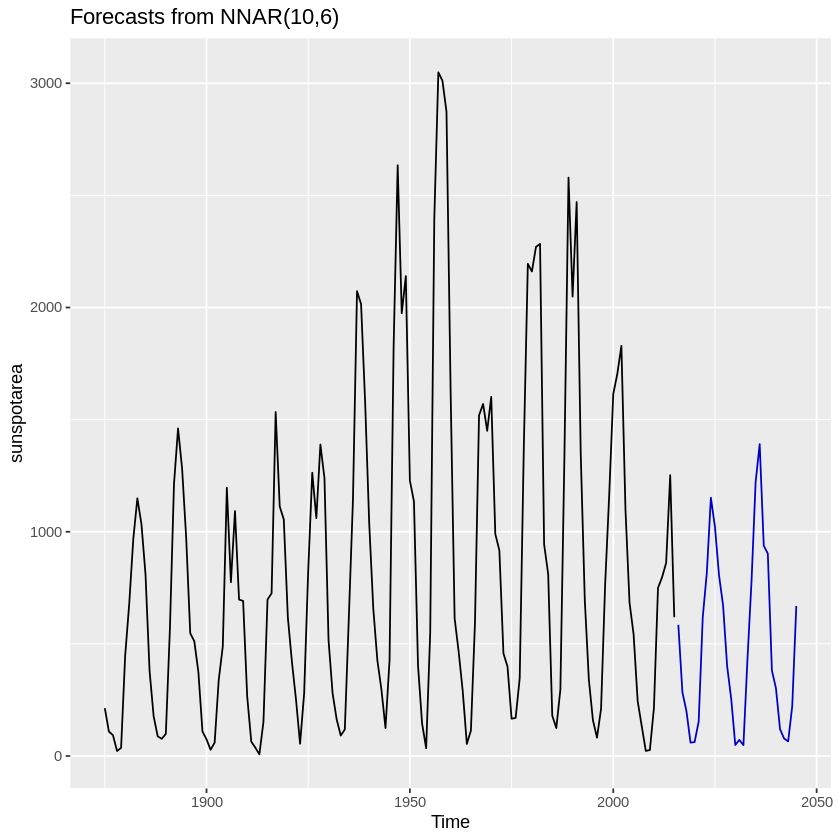

In [31]:
fit <- nnetar(sunspotarea, lambda=0)

autoplot(forecast(fit,h=30))

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



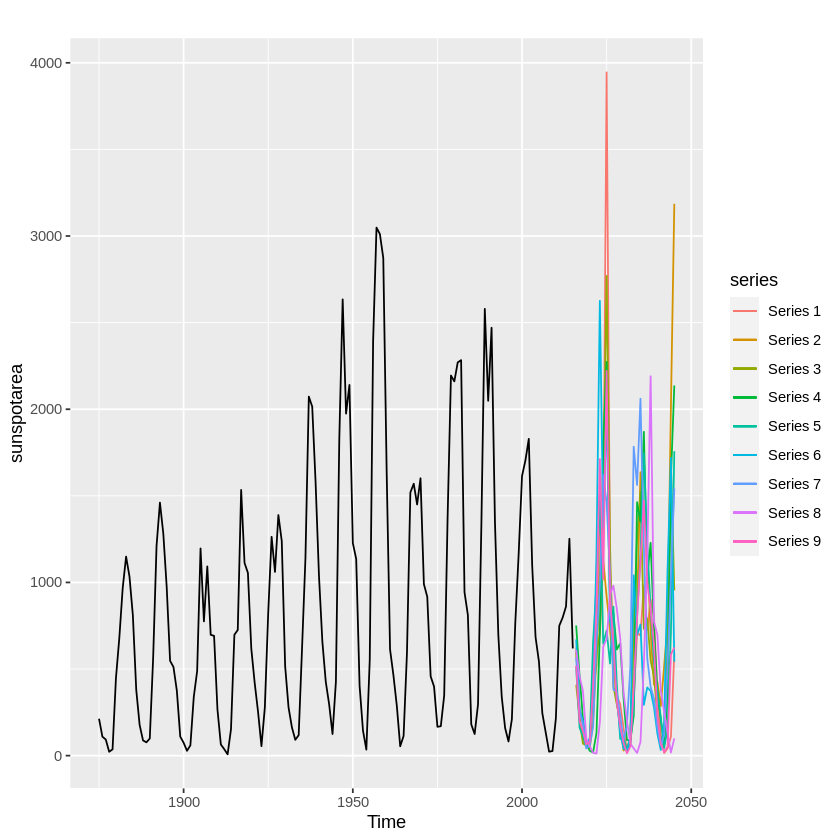

In [32]:
sim <- ts(matrix(0, nrow=30L, ncol=9L),
start=end(sunspotarea)[1L]+1L)
for(i in seq(9))
sim[,i] <- simulate(fit, nsim=30L)
autoplot(sunspotarea) + autolayer(sim)

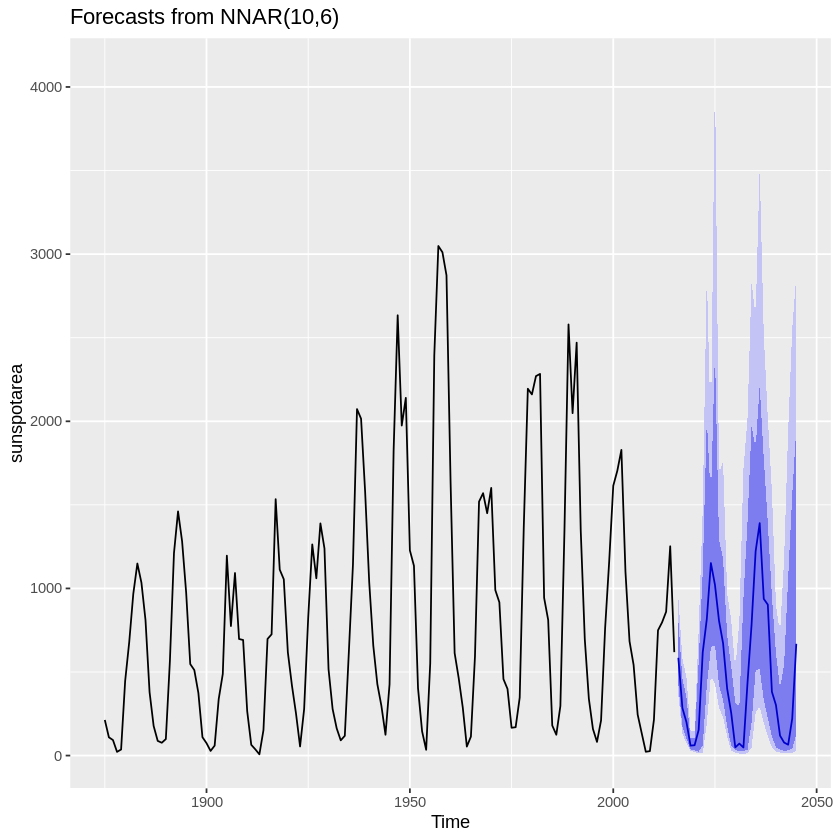

In [33]:
fcast <- forecast(fit, PI=TRUE, h=30)
autoplot(fcast)

11.4 Bootstrapping and bagging

Methodology:

1) Box-Cox Transformation

2) STL decomposition (trend, season, remainder)

3) Resample the remainder time series as bootstrapping
  > blocked bootstrap

4) Recombine the trend and season components with the bootstrapped remainder

5) Undo the Box-Cox transformation

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



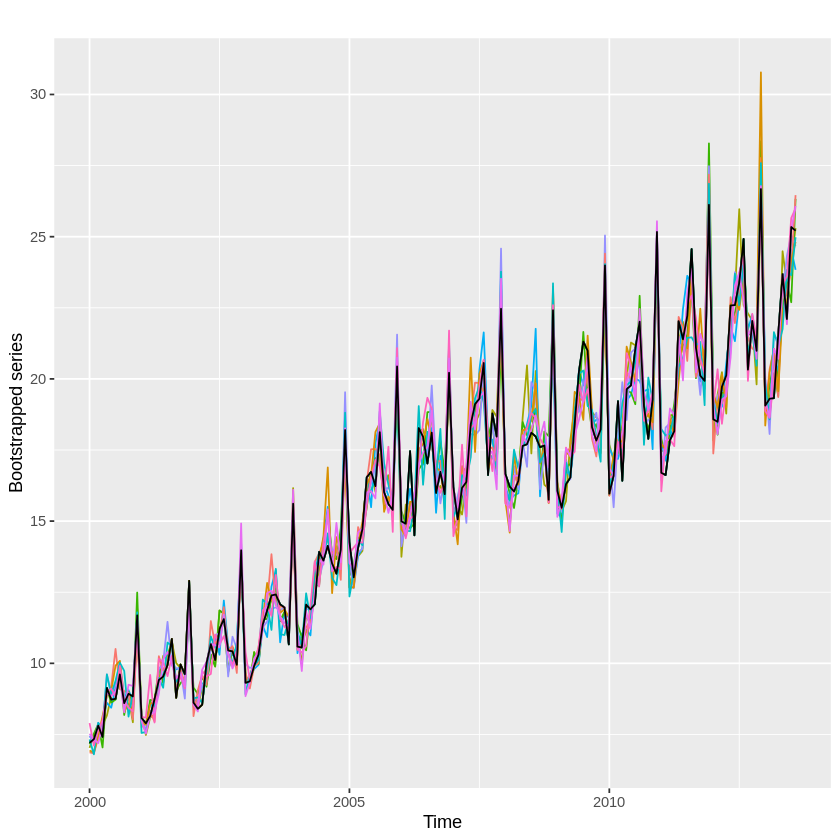

In [34]:
bootseries <- bld.mbb.bootstrap(debitcards, 10) %>%
as.data.frame() %>% ts(start=2000, frequency=12)

autoplot(debitcards) +
autolayer(bootseries, colour=TRUE) +
autolayer(debitcards, colour=FALSE) +
ylab("Bootstrapped series") + guides(colour="none")

In [35]:
## Simulation of the Original Time Series
##

nsim <- 1000L
sim <- bld.mbb.bootstrap(debitcards, nsim)

In [36]:
h <- 36L
future <- matrix(0, nrow=nsim, ncol=h)
for(i in seq(nsim))
future[i,] <- simulate(ets(sim[[i]]), nsim=h)

In [38]:
start <- tsp(debitcards)[2]+1/12

simfc <- structure(list(
          mean = ts(colMeans(future), start=start, frequency=12),
          lower = ts(apply(future, 2, quantile, prob=0.025),
                      start=start, frequency=12),
          upper = ts(apply(future, 2, quantile, prob=0.975),
                      start=start, frequency=12),
          level=95),
          class="forecast")

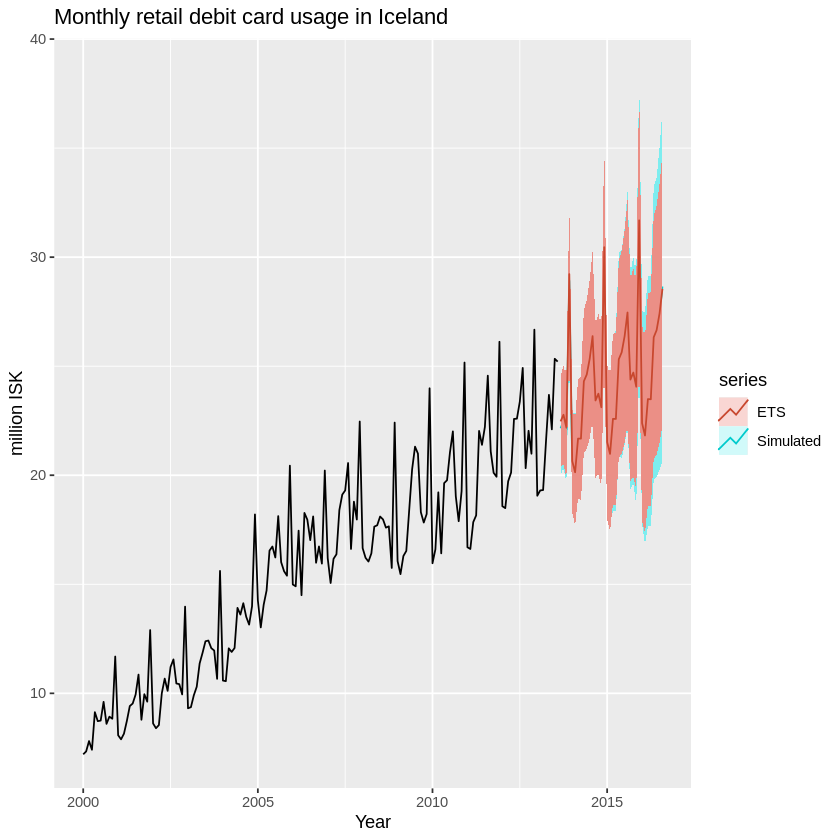

In [39]:
etsfc <- forecast(ets(debitcards), h=h, level=95)

autoplot(debitcards) +
  ggtitle("Monthly retail debit card usage in Iceland") +
  xlab("Year") + ylab("million ISK") +
  autolayer(simfc, series="Simulated") +
  autolayer(etsfc, series="ETS")

Bagged ETS Forecasts

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



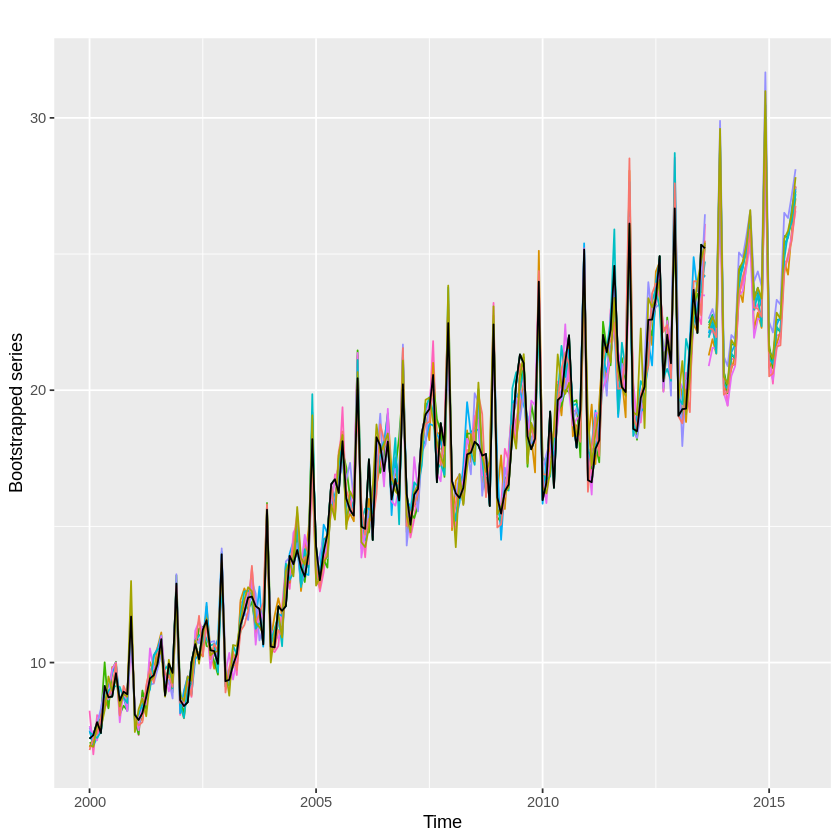

In [40]:
sim <- bld.mbb.bootstrap(debitcards, 10) %>%
  as.data.frame() %>%
  ts(frequency=12, start=2000)

fc <- purrr::map(as.list(sim),
                function(x){forecast(ets(x))[["mean"]]}) %>%
      as.data.frame() %>%
      ts(frequency=12, start=start)
    
autoplot(debitcards) +
autolayer(sim, colour=TRUE) +
autolayer(fc, colour=TRUE) +
autolayer(debitcards, colour=FALSE) +
ylab("Bootstrapped series") +
guides(colour="none")

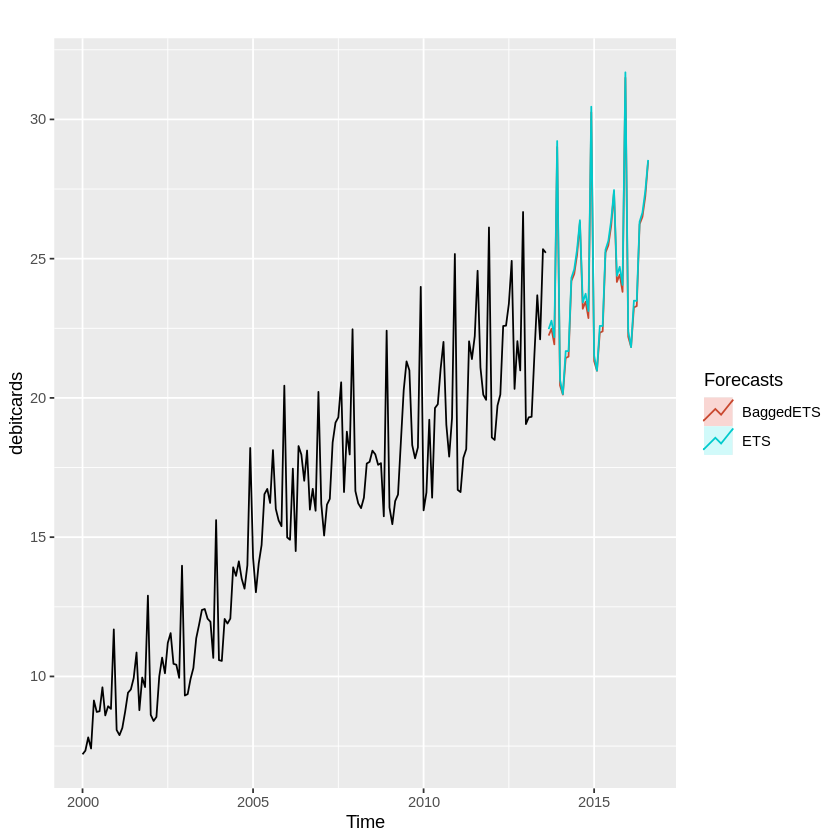

In [41]:
etsfc <- debitcards %>% ets() %>% forecast(h=36)

baggedfc <- debitcards %>% baggedETS() %>% forecast(h=36)

autoplot(debitcards) +
autolayer(baggedfc, series="BaggedETS", PI=FALSE) +
autolayer(etsfc, series="ETS", PI=FALSE) +
guides(colour=guide_legend(title="Forecasts"))